In [ ]:
! pip install -Uq torch torchvision tensorboard sentence-transformers datasets

In [ ]:
import wandb
wandb.init(mode="disabled")

#### **Create and Prepare embedding dataset**

In [ ]:
from datasets import load_dataset
import unicodedata

dataset = load_dataset("rasyosef/2AIRTC-Amharic-Adhoc-Information-Retrieval-Test-Collection", split="documents")
dataset = dataset.map(lambda row: {"doc_text": unicodedata.normalize("NFKD", row["doc_text"])})#.select(range(100))
dataset = dataset.map(lambda row: {"length": len(row['doc_text'].split())})#.select(range(100))
dataset = dataset.filter(lambda row: row['length'] < 1200)
dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


Dataset({
    features: ['doc_no', 'doc_text', 'relevant_topic_nos', 'relevant_topic_titles', 'relevant_topic_descriptions', 'relevant_topic_narratives', 'length'],
    num_rows: 12192
})

In [ ]:
import hashlib

def md5(text):
 return hashlib.md5(text.strip().encode()).hexdigest()

md5("hello world ")

'5eb63bbbe01eeed093cb22bb8f5acdc3'

In [ ]:
dataset = dataset.map(lambda row: {"hash_id": md5(row["doc_text"])})
dataset

Dataset({
    features: ['doc_no', 'doc_text', 'relevant_topic_nos', 'relevant_topic_titles', 'relevant_topic_descriptions', 'relevant_topic_narratives', 'length', 'hash_id'],
    num_rows: 12192
})

In [ ]:
len(set(dataset["hash_id"]))

11036

In [ ]:
selected_rows = []
article_ids = set()

for row in dataset:
  if row["hash_id"] not in article_ids:
    selected_rows.append(row)
  article_ids.add(row["hash_id"])

len(selected_rows)

11036

In [ ]:
# from datasets import Dataset

# dataset = Dataset.from_list(selected_rows)
# dataset

In [ ]:
import unicodedata
dataset[80]["doc_text"], unicodedata.normalize("NFKD", dataset[80]["doc_text"]) # dataset[32]

('10  እንግዲህ ወንድሞች፣ አባቶቻችን ሁሉ ከደመና በታች እንደነበሩና ሁሉም በባሕር መካከል እንዳለፉ ታውቁ ዘንድ እወዳለሁ፤\n2  ሁሉም ከሙሴ ጋር በመተባበር በደመናውና በባሕሩ ተጠመቁ፤\n3  ደግሞም ሁሉም አንድ ዓይነት መንፈሳዊ ምግብ ተመገቡ፤\n4  በተጨማሪም ሁሉም አንድ ዓይነት መንፈሳዊ መጠጥ ጠጡ። ይከተላቸው ከነበረው መንፈሳዊ ዓለት ይጠጡ ነበርና፤ ይህም ዓለት ክርስቶስን ያመለክታል።\n5  ይሁንና አምላክ በአብዛኞቹ ስላልተደሰተ በምድረ በዳ ወድቀው ቀርተዋል።\n6  እነሱ ጎጂ የሆኑ ነገሮችን እንደተመኙ እኛም እንዳንመኝ እነዚህ ነገሮች ለእኛ ምሳሌ ሆነውልናል።\n7  “ሕዝቡ ሊበሉና ሊጠጡ ተቀመጡ። ከዚያም ሊጨፍሩ ተነሱ” ተብሎ እንደተጻፈው ከእነሱ አንዳንዶቹ እንዳደረጉት ጣዖት አምላኪዎች አትሁኑ።\n8  ከእነሱ አንዳንዶቹ የፆታ ብልግና ፈጽመው ከመካከላቸው 23,000 የሚሆኑት በአንድ ቀን እንደረገፉ እኛም የፆታ ብልግና አንፈጽም።\n9  ከእነሱ አንዳንዶቹ ይሖዋን ተፈታትነው በእባቦች እንደጠፉ እኛም አንፈታተነው።\n10  በተጨማሪም ከእነሱ አንዳንዶቹ በማጉረምረማቸው በአጥፊው እንደጠፉ አጉረምራሚዎች አትሁኑ።\n11  እነዚህ ነገሮች ምሳሌ ይሆኑ ዘንድ በእነሱ ላይ ደረሱ፤ የተጻፉትም የሥርዓቶቹ ፍጻሜ የደረሰብንን እኛን ለማስጠንቀቅ ነው።\n12  በመሆኑም የቆመ የሚመስለው እንዳይወድቅ ይጠንቀቅ።\n13  በሰው ሁሉ ላይ ከሚደርሰው ፈተና የተለየ ፈተና አልደረሰባችሁም። ይሁንና አምላክ ታማኝ ነው፤ ልትሸከሙት ከምትችሉት በላይ ፈተና እንዲደርስባችሁ አይፈቅድም፤ ከዚህ ይልቅ ፈተናውን በጽናት መቋቋም እንድትችሉ ፈተና ሲደርስባችሁ መውጫ መንገዱን ያዘጋጅላችኋል።\n14  ስለዚህ የተወደዳችሁ ወንድሞቼ፣ ከጣዖት አምልኮ ሽሹ።\n15  ይህን የምናገረው ማስተዋ

In [ ]:
# rename columns
# dataset = dataset.rename_column("query", "anchor")
dataset = dataset.rename_column("doc_text", "positive")

In [ ]:
# Add an id column to the dataset
corpus_dataset = dataset.add_column("id", range(len(dataset)))
corpus_dataset

Dataset({
    features: ['doc_no', 'positive', 'relevant_topic_nos', 'relevant_topic_titles', 'relevant_topic_descriptions', 'relevant_topic_narratives', 'length', 'hash_id', 'id'],
    num_rows: 12192
})

#### **Create baseline and evaluate pretrained model**

In [ ]:
from sentence_transformers.evaluation import InformationRetrievalEvaluator, SequentialEvaluator
from sentence_transformers.util import cos_sim
from datasets import load_dataset, concatenate_datasets

In [ ]:
# Convert the datasets to dictionaries
corpus = dict(
    zip(corpus_dataset["id"], corpus_dataset["positive"])
) # Our corpus (cid => document)

query_to_pass = {}
for row in corpus_dataset:
  for query in row['relevant_topic_titles']:
    if query not in query_to_pass:
      query_to_pass[query] = []
    query_to_pass[query].append(row['id'])

# too_many_relevant = []
# for query, relevant_ids in query_to_pass.items():
#   if len(relevant_ids) > 80:
#     too_many_relevant.append(query)

# for query in too_many_relevant:
#   query_to_pass.pop(query)

queries = dict(
    zip(range(len(query_to_pass)), query_to_pass.keys())
) # Our queries (qid => question)

len(query_to_pass)

240

In [ ]:
# Create a mapping of relevant document (1 in our case) for each query
relevant_docs = {}
for q_id, query in queries.items():
  relevant_docs[q_id] = query_to_pass[query]

lens = [len(l) for l in relevant_docs.values()]
max(lens), min(lens)

(172, 5)

(array([81., 56., 36., 21.,  9.,  9.,  6.,  6.,  3.,  2.,  0.,  3.,  0.,
         3.,  1.,  0.,  1.,  1.,  1.,  1.]),
 array([  5.  ,  13.35,  21.7 ,  30.05,  38.4 ,  46.75,  55.1 ,  63.45,
         71.8 ,  80.15,  88.5 ,  96.85, 105.2 , 113.55, 121.9 , 130.25,
        138.6 , 146.95, 155.3 , 163.65, 172.  ]),
 <BarContainer object of 20 artists>)

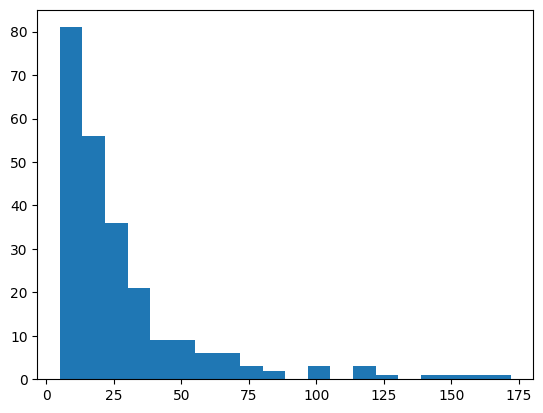

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lens, bins=20)

(12192, 15, 100, 133, 435, 598, 1199)

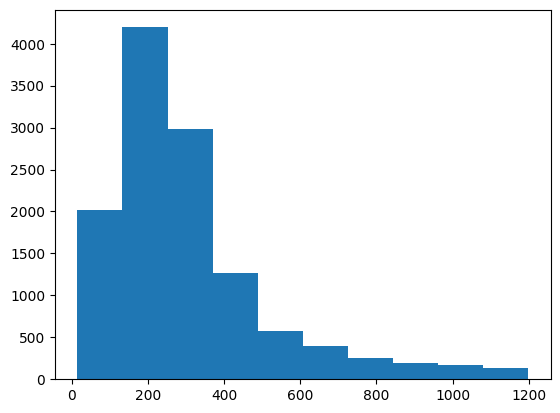

In [ ]:
article_lengths = sorted([len(article.split()) for article in corpus_dataset["positive"]])

plt.hist(article_lengths)
len(article_lengths), article_lengths[0], article_lengths[1000], article_lengths[2000], article_lengths[10000], article_lengths[11000], max(article_lengths)

#### **Evaluate Amharic Embedding model**

List of models to evaluate:
- intfloat/multilingual-e5-large-instruct
- Alibaba-NLP/gte-modernbert-base
- Alibaba-NLP/gte-multilingual-base


In [ ]:
# BGE Small
import torch
from sentence_transformers import SentenceTransformer

# model_id = "rasyosef/roberta-amharic-text-embedding-base"
# model_id = "rasyosef/roberta-amharic-text-embedding-medium"
# model_id = "rasyosef/bert-amharic-text-embedding-medium"
# model_id = "yosefw/roberta-amharic-embed-medium"
# model_id = "yosefw/roberta-amharic-embed-base"
# model_id = "yosefw/roberta-amharic-embed-medium-v4"

# model_id = "rasyosef/snowflake-arctic-embed-l-v2.0-finetuned-amharic"

# # OTHER MODELS
# model_id = "intfloat/multilingual-e5-large-instruct"
# model_id = "Alibaba-NLP/gte-modernbert-base"
model_id = "Alibaba-NLP/gte-multilingual-base"
# model_id = "Snowflake/snowflake-arctic-embed-l-v2.0"

# Load a model
model = SentenceTransformer(
    model_id,
    device="cuda" if torch.cuda.is_available() else "cpu",
    trust_remote_code=True
)

In [ ]:
EMBED_DIM = model.get_sentence_embedding_dimension()
matryoshka_dimensions = [EMBED_DIM]

print("Embedding Dimension:", EMBED_DIM)

matryoshka_evaluators = []
# Iterate over the different dimensions
for dim in matryoshka_dimensions:
  ir_evaluator = InformationRetrievalEvaluator(
      queries=queries,
      corpus=corpus,
      relevant_docs=relevant_docs,
      batch_size=32,
      name=f"dim_{dim}",
      truncate_dim=dim,
      score_functions={"cosine": cos_sim},
      mrr_at_k=[100, 200],
      ndcg_at_k=[100, 200],
      precision_recall_at_k=[100, 200],
      corpus_chunk_size=256,
      show_progress_bar=True
  )
  matryoshka_evaluators.append(ir_evaluator)

# Create a sequential evaluator
evaluator = SequentialEvaluator(matryoshka_evaluators)

Embedding Dimension: 768


In [ ]:
# Evaluate the model
results = evaluator(model)

In [ ]:
dim = EMBED_DIM
metrics = [

    f"dim_{dim}_cosine_mrr@100",
    f"dim_{dim}_cosine_ndcg@100",
    f"dim_{dim}_cosine_recall@100",
    f"dim_{dim}_cosine_recall@200",
    f"dim_{dim}_cosine_mrr@200",
    f"dim_{dim}_cosine_ndcg@200",
  ]

for key in metrics:
  metric_name = key.split("_")[-1]
  print(f"{metric_name}: {round(results[key], 3)}")

mrr@100: 0.879
ndcg@100: 0.749
recall@100: 0.79
recall@200: 0.865
mrr@200: 0.879
ndcg@200: 0.777


In [ ]:
# rasyosef/snowflake-arctic-embed-l-v2.0-finetuned-amharic

# recall@100: 0.8555131629384148
# recall@200: 0.9225609529144673
# mrr@100: 0.8650892258612847
# mrr@200: 0.8650892258612847
# ndcg@100: 0.794636867505878
# ndcg@200: 0.8205728924692759

In [ ]:
# roberta-amharic-text-embedding-base

# recall@100: 0.8305871818934979
# recall@200: 0.9096175395022249
# mrr@100: 0.8614214778277277
# mrr@200: 0.8614514538469124
# ndcg@100: 0.7698477319071644
# ndcg@200: 0.8012842862416171

In [ ]:
# roberta-amharic-text-embedding-medium

# recall@100: 0.7984434989468506
# recall@200: 0.877731938693818
# mrr@100: 0.8529819170215512
# mrr@200: 0.8530108522067364
# ndcg@100: 0.7354763240088282
# ndcg@200: 0.7667789949278832

In [ ]:
# bert-amharic-text-embedding-medium

# recall@100: 0.7267090304645936
# recall@200: 0.828525086851735
# mrr@100: 0.8047062526368022
# mrr@200: 0.8047811058368762
# ndcg@100: 0.6670833483179204
# ndcg@200: 0.7069292286532755

In [ ]:
# Alibaba-NLP/gte-modernbert-base

# recall@100: 0.021024024209110335
# recall@200: 0.03322214720863858
# mrr@100: 0.04633821137542249
# mrr@200: 0.047172489087732895
# ndcg@100: 0.017054409723806126
# ndcg@200: 0.021458554158770553

In [ ]:
# Alibaba-NLP/gte-multilingual-base

# recall@100: 0.7899475499563934
# recall@200: 0.8647560292617974
# mrr@100: 0.8788994277148346
# mrr@200: 0.878931478996886
# ndcg@100: 0.7486111327632567
# ndcg@200: 0.7768912590561282

In [ ]:
# intfloat/multilingual-e5-large-instruct

# recall@100: 0.8531971699420808
# recall@200: 0.9112757250859729
# mrr@100: 0.9053893886910193
# mrr@200: 0.9054298417654529
# ndcg@100: 0.8079874321586658
# ndcg@200: 0.8296889386771418

In [ ]:
# Snowflake/snowflake-arctic-embed-l-v2.0

# recall@100: 0.8301237965478369
# recall@200: 0.8973766434554113
# mrr@100: 0.8762087948353232
# mrr@200: 0.8762087948353232
# ndcg@100: 0.7809149877967017
# ndcg@200: 0.806770455429829

### **Example**

In [ ]:
sentences = [
  "የተደጋገመው የመሬት መንቀጥቀጥና የእሳተ ገሞራ ምልክት በአፋር ክልል",
  "የዋጋ ግሽበት በባለሙያዎች እና ነዋሪዎች አተያይ",
  "ከተደጋጋሚ መሬት መንቀጥቀጥ በኋላ አፋር ክልል እሳት ከመሬት ውስጥ ሲፈላ ታይቷል፡፡ ከመሬት ውስጥ እሳትና ጭስ የሚተፋው እንፋሎቱ ዛሬ ማለዳውን 11 ሰዓት ግድም ከከባድ ፍንዳታ በኋላየተስተዋለ መሆኑን የአከባቢው ነዋሪዎች እና ባለስልጣናት ለዶቼ ቬለ ተናግረዋል፡፡ አለት የሚያፈናጥር እሳት ነው የተባለው እንፋሎቱ በክልሉ ጋቢረሱ (ዞን 03) ዱለቻ ወረዳ ሰጋንቶ ቀበሌ መከሰቱን የገለጹት የአከባቢው የአይን እማኞች ከዋናው ፍንዳታ በተጨማሪ በዙሪያው ተጨማሪ ፍንዳታዎች መታየት ቀጥሏል ባይ ናቸው፡፡",
  "ለኢትዮጵያ ብሔራዊ ባንክ ዋጋን የማረጋጋት ቀዳሚ ዓላማ ጋር የተጣጣሙ የገንዘብ ፖሊሲ ምክረ ሀሳቦችን እንዲሰጥ የተቋቋመው የኢትዮጵያ ብሔራዊ ባንክ የገንዘብ ፖሊሲ ኮሚቴ እስካለፈው ህዳር ወር የነበረው እአአ የ2024 የዋጋ ግሽበት በተለይምምግብ ነክ ምርቶች ላይ ከአንድ ዓመት በፊት ከነበው ጋር ሲነጻጸር መረጋጋት ማሳየቱን ጠቁሟል፡፡ ዶይቼ ቬለ ያነጋገራቸው የአዲስ አበባ ነዋሪዎች ግን በዚህ የሚስማሙ አይመስልም፡፡ ከአምና አንጻር ያልጨመረ ነገር የለም ባይ ናቸው፡፡ የኢኮኖሚ  ባለሙያም በሰጡን አስተያየት ጭማሪው በሁሉም ረገድ የተስተዋለ በመሆኑ የመንግስት ወጪን በመቀነስ ግብርናው ላይ አተኩሮ መስራት ምናልባትም የዋጋ መረጋጋቱን ሊያመጣ ይችላል ይላሉ፡፡"
]
embeddings = model.encode(sentences)

# Get the similarity scores for the embeddings
similarities = model.similarity(embeddings, embeddings)
print(similarities)

tensor([[1.0000, 0.5113, 0.7750, 0.4079],
        [0.5113, 1.0000, 0.4690, 0.5724],
        [0.7750, 0.4690, 1.0000, 0.4150],
        [0.4079, 0.5724, 0.4150, 1.0000]])


In [ ]:
# Alibaba-NLP/gte-multilingual-base
